<a href="https://colab.research.google.com/github/Alecia113/self-directed-exercises-python-/blob/main/lab3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from random import shuffle

import torch.nn.functional as F

# Raw data - sentences
# Let's create toy data for simplicity 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_list = " ".join(sentences).split()
word_list = list(set(word_list))


# make dictionary so that we can reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# make window size=1 for cbow
# i.e.) he likes cat
#   -> ([likes], he), ([he, cat], likes), ([likes], cat)
#   -> ([likes, likes], he), ([he, cat], likes), ([likes, likes], cat)
# Double the input when the word doesn't have two neighbours
# This will make your input have the same size, which will make it easier when you write the CBOW model code
# But this trick only works when window_size = 1

cbow = []

for sentence in sentences:
    sentence = sentence.split()
    for i in range(len(sentence)):
        centre = word_dict[sentence[i]]
        if i > 0 and i < len(sentence)-1:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]
        elif i == 0:
            context = [word_dict[sentence[i + 1]], word_dict[sentence[i + 1]]]
        else:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i - 1]]]

        cbow.append([context, centre])

# hyperparameter
voc_size = len(word_list)#13
learning_rate = 0.1
batch_size = 16
embedding_size = 2
no_of_epochs = 5000

In [116]:
'''
准备输入的数据
把一个拿出来然后转换成
要把它变成one-hot
#感觉这个data_temp 就是cbow
TypeError: list indices must be integers or slices, not list
这是一个经典的错误。i你的情况是已经从一个元素array（即另一个列表），没有的索引array（不是一个int），所
import numpy as np
integerarray = np.array([33,11,22], dtype=int)
integerarray[indexArray]
这样肯定错了，因为a是数字而不是字符，数字是不支持切片的，要转换成字符才行，像这样

#bug
  input_temp[cbow[i][0][0]] =1
  TypeError: list indices must be integers or slices, not list

TypeError: 'list' object is not callable
Python: 'int' object is not subscriptable error
问题是cbow（[][][])多加了括号
去掉括号

'''
'''
import numpy as np

inputs = []
labels = []
ouputs = []


#输入
for i in range(len(cbow)):
  input_temp = [0]*voc_size
  input_temp[cbow[i][0][0]] =1  #让cbow中的参数位置=1 就换成了对应位置的单词的one-hot形式
  inputs.append(input_temp) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  48个
  labels.append(cbow[i][1]) #对应中心词的位置坐标？he : 2 录入的就是2；存在字典如果查询2，就能找到he

output_temp = [0]*voc_size
output_temp[data_temp[i][0]] = 1
outputs.append(ouput_temp)
labels.append(data_temp[i][1])
np.array(inputs)

'''



[]

In [136]:
#prepare batch data from cbow
#输入函数
#?需要输出吗？输出的是一个扩散向量。
def prepare_batch(data_temp):     #data_temp = cbow
  inputs = []
  labels = []
  for i in range(len(data_temp)):
    input_temp = [0]*voc_size
    input_temp[data_temp[i][0][0]] = 1
    inputs.append(input_temp)
    labels.append(data_temp[i][1])
  return np.array(inputs),np.array(labels)

In [ ]:
'''
让input里的元素每一项*W1 再求和 再除以 个数len(inputs)
'''

In [124]:
voc_size = len(word_list)#13 不重复的词
#embedding的本质是用一个较低维度的向量来代替较高维度的原始特征。在推荐系统中，原始向量往往会用超高维的稀疏one-hot向量来表示，使用embedding可以用较低的维度（即embedding size）来表示高维稀疏的特征，
#https://blog.csdn.net/weixin_39548654/article/details/103541968?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161667571016780266297252%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161667571016780266297252&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-9-103541968.first_rank_v2_pc_rank_v29&utm_term=embedding_size+做什么的
#embedding
W1 = torch.randn(voc_size, embedding_size, requires_grad=True)#voc_size 行embedding列 #随机#我认为他是词向量 embedding_size我认为是维度



In [140]:
for ind in range(0,len(cbow),batch_size):   #0 ,48, 16
    data_temp = cbow[ind : min(ind+batch_size, len(cbow))]
batch_size

16

TEST

In [ ]:
word_dict

{'animal': 11,
 'bone': 10,
 'cat': 9,
 'dislikes': 2,
 'dog': 4,
 'fish': 5,
 'game': 8,
 'he': 1,
 'likes': 7,
 'milk': 3,
 'movie': 12,
 'music': 6,
 'she': 0}

In [ ]:
context

[2, 2]

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

word_list = " ".join(sentences).split()   #把每个单词拆出来
word_list = list(set(word_list))   #把重复的单词都去掉，每个单词都取一个

word_dict = {w: i for i, w in enumerate(word_list)} # enumerate  （因·妞·摸·锐·忒）列举，枚举，计算。#取的不是个数么？怎么取得是序号ß
cbow = []

# make window size=1 for skip-gram

for sentence in sentences:
  sentence = sentence.split()       #['cat', 'dislikes', 'dog']
  for i in range(len(sentence)):      #3
    centre = word_dict[sentence[i]]     #5
    if i > 0 and i < len(sentence)-1:
      context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]  #[11, 5]
    elif i ==0:
      context = [word_dict[sentence[i + 1]]]
    else:
      context = [word_dict[sentence[i - 1]]]

    # skipgrams - (centre, context[0]), (centre, context[1])..
    '''
    for w in context:
      cbow.append([centre, w])
'''
    cbow.append([context, centre])
    print(cbow)#自加



[[[12], 2]]
[[[12], 2], [[2, 11], 12]]
[[[12], 2], [[2, 11], 12], [[12], 11]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2], [[2, 5], 12]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2], [[2, 5], 12], [[12], 5]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2], [[2, 5], 12], [[12], 5], [[11], 6]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2], [[2, 5], 12], [[12], 5], [[11], 6], [[6, 5], 11]]
[[[12], 2], [[2, 11], 12], [[12], 11], [[12], 2], [[2, 6], 12], [[12], 6], [[12], 2], [[2, 5], 12], [[12], 5], [[11], 6], [[6, 5], 11], [[11], 5]]
[[[12], 2], [[2, 11], 12], [[12

In [ ]:
trained_embeddings = W1.data.numpy()

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',ha= 'right',va='bottom')  #textcoords:名字又分到各自的点上了，有些点的名字改善了，能看清了
          #ha 名字在点的左上方 va 没看出来有什么变化

plt.show()

练习

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from random import shuffle

# Raw data - sentences
# Let's create toy data for simplicity 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_list = " ".join(sentences).split()
word_list = list(set(word_list))


# make dictionary so that we can reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# make window size=1 for cbow
# i.e.) he likes cat
#   -> ([likes], he), ([he, cat], likes), ([likes], cat)
#   -> ([likes, likes], he), ([he, cat], likes), ([likes, likes], cat)
# Double the input when the word doesn't have two neighbours
# This will make your input have the same size, which will make it easier when you write the CBOW model code
# But this trick only works when window_size = 1

cbow = []


for sentence in sentences:
    sentence = sentence.split()
    for i in range(len(sentence)):
        centre = word_dict[sentence[i]]
        if i > 0 and i < len(sentence)-1:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]
        elif i == 0:
            context = [word_dict[sentence[i + 1]], word_dict[sentence[i + 1]]]
        else:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i - 1]]]

        #cbow.append([context, centre])
        cbow.append([context, centre])

        print(cbow)#自加        

# hyperparameter
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 16
embedding_size = 2
no_of_epochs = 5000

[[[12, 12], 2]]
[[[12, 12], 2], [[2, 11], 12]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6], [[12, 12], 2]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6], [[12, 12], 2], [[2, 5], 12]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6], [[12, 12], 2], [[2, 5], 12], [[12, 12], 5]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6], [[12, 12], 2], [[2, 5], 12], [[12, 12], 5], [[11, 11], 6]]
[[[12, 12], 2], [[2, 11], 12], [[12, 12], 11], [[12, 12], 2], [[2, 6], 12], [[12, 12], 6], [[12, 12], 2], [[2, 5], 12], [[12, 12], 5], [[11, 11], 6], [[6, 5], 11]]
[[

In [ ]:
#不循环损失小一半

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from random import shuffle

voc_size = len(word_list)

# prepare batch from skip-gram
def prepare_batch(data_temp):
    inputs = []
    labels = []

    for i in range(len(data_temp)):
        input_temp = [0]*voc_size
        input_temp[data_temp[i][0][0]] = 1 # ont-hot input
        inputs.append(input_temp)  # centre
        labels.append(data_temp[i][1])  # context word

    return np.array(inputs), np.array(labels)


W1 = torch.randn(voc_size, embedding_size, requires_grad=True)
Wout = torch.randn(embedding_size, voc_size, requires_grad=True)
#j



for epoch in range(no_of_epochs):

    # shuffle the training set to make each epoch's batch different, you can also skip this step
    shuffle(cbow)
    loss_sum = 0

    for ind in range(0,len(cbow),batch_size):   #不理解
        data_temp = cbow[ind : min(ind+batch_size, len(cbow))]  #不理解
        inputs_temp, labels_temp = prepare_batch(data_temp)
   
        inputs_torch = torch.from_numpy(inputs_temp).float()
        labels_torch = torch.from_numpy(labels_temp)

        hidden = torch.matmul(inputs_torch ,W1)
        out = torch.matmul(hidden,Wout)

        log_softmax = F.log_softmax(out,dim=1)
        loss = F.nll_loss(log_softmax, labels_torch)

        loss.backward()


        with torch.no_grad():
            W1.data -= learning_rate*W1.grad.data
            Wout.data -= learning_rate*Wout.grad.data

        W1.grad.data.zero_()
        Wout.grad.data.zero_()

        loss_sum += loss.item()

    if epoch % 500 == 499: 
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss_sum))
#4.49

Epoch: 500, loss: 5.0492
Epoch: 1000, loss: 4.8111
Epoch: 1500, loss: 4.7858
Epoch: 2000, loss: 4.7793
Epoch: 2500, loss: 4.8046
Epoch: 3000, loss: 4.7593
Epoch: 3500, loss: 4.7474
Epoch: 4000, loss: 4.7457
Epoch: 4500, loss: 4.7731
Epoch: 5000, loss: 4.7920


In [ ]:
#改

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from random import shuffle
import torch.optim as optim

voc_size = len(word_list)
class ModelWithoutHiddenLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(ModelWithoutHiddenLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size) # This coresponds to W1,B1

    def prepare_batch(self, data_temp):
      inputs = []
      labels = []
      for i in range(len(data_temp)):
        input_temp = [0]*voc_size
        input_temp[data_temp[i][0][0]] = 1 # ont-hot input
        inputs.append(input_temp)  # centre
        labels.append(data_temp[i][1])  # context word

        
        return np.array(inputs), np.array(labels)

'''
    def forward(self, data_temp):
        data_temp = self.linear(data_temp)
        return data_temp

'''
# prepare batch from skip-gram



# Initialize the model
model = ModelWithoutHiddenLayer(voc_size, voc_size)


W1 = torch.randn(voc_size, embedding_size, requires_grad=True)
Wout = torch.randn(embedding_size, voc_size, requires_grad=True)
#j

optimiser = optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(no_of_epochs):

    # shuffle the training set to make each epoch's batch different, you can also skip this step
    shuffle(cbow)
    loss_sum = 0

    for ind in range(0,len(cbow),batch_size):   #不理解
        data_temp = cbow[ind : max(ind+batch_size, len(cbow))]  #不理解
        inputs_temp, labels_temp = prepare_batch(data_temp)
   
        inputs_torch = torch.from_numpy(inputs_temp).float()
        labels_torch = torch.from_numpy(labels_temp)

        model.train()

        optimiser.zero_grad()

        hidden = torch.matmul(inputs_torch ,W1)
        out = torch.matmul(hidden,Wout)

        log_softmax = F.log_softmax(out,dim=1)
        loss = F.nll_loss(log_softmax, labels_torch)

        loss.backward()
        optimiser.step()
        
        with torch.no_grad():
            W1.data -= learning_rate*W1.grad.data
            Wout.data -= learning_rate*Wout.grad.data

        W1.grad.data.zero_()
        Wout.grad.data.zero_()

        loss_sum += loss.item()

    if epoch % 500 == 499: 
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss_sum))
#4.49


Epoch: 500, loss: 5.0200
Epoch: 1000, loss: 4.9982
Epoch: 1500, loss: 4.9666
Epoch: 2000, loss: 4.3298
Epoch: 2500, loss: 4.5563
Epoch: 3000, loss: 4.7328
Epoch: 3500, loss: 4.7036
Epoch: 4000, loss: 4.8582
Epoch: 4500, loss: 4.6260
Epoch: 5000, loss: 4.9225


she  :  -0.6103535   -1.5919579
he  :  -4.9380736   -3.5698276
dislikes  :  3.5615127   4.400433
milk  :  0.686443   0.4144985
dog  :  -3.0598779   0.7964105
fish  :  -0.59649307   0.036581434
music  :  0.13711913   0.6838736
likes  :  0.33998787   0.68210465
game  :  -0.9144723   -0.37536058
cat  :  1.5754573   -3.0993414
bone  :  2.3876345   1.8560499
animal  :  0.6494056   -0.49135694
movie  :  -0.33855063   0.23608752


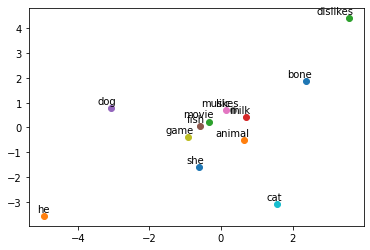

In [ ]:
trained_embeddings = W1.data.numpy()

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  print(label," : ", x, " ", y)  #非必须 #（-2，4）（-4，4）
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',ha= 'right',va='bottom')  #textcoords:名字又分到各自的点上了，有些点的名字改善了，能看清了
          #ha 名字在点的左上方 va 没看出来有什么变化

plt.show()